# Predict Popularity rating

# Task 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import seaborn as sns


%matplotlib inline

In [2]:
data3= pd.read_csv("W:\intern min project\spotify_data\data.csv",)

In [3]:
data3.shape

(169909, 19)

In [4]:
data3.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [5]:
data3["popularity"]= [ 1 if i>=66.5 else 0 for i in data3.popularity ]
data3["popularity"].value_counts()


0    162612
1      7297
Name: popularity, dtype: int64

In [6]:
a=data3[data3["popularity"]==1]
a.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.0,7297.000000,7297.000000,7297.000000,7297.000000
mean,0.248213,0.635226,217523.299712,0.627288,0.308209,0.040169,5.192545,0.178443,-7.272764,0.636426,1.0,0.101923,120.671469,0.500956,2010.801836
std,0.265867,0.167081,54806.874777,0.201137,0.461785,0.167650,3.584400,0.141956,4.291995,0.481061,0.0,0.102930,30.394175,0.239226,13.228049
min,0.000000,0.000000,37640.000000,0.000020,0.000000,0.000000,0.000000,0.000000,-54.376000,0.000000,1.0,0.000000,0.000000,0.000000,1956.000000
25%,0.034600,0.538000,185093.000000,0.505000,0.000000,0.000000,2.000000,0.094100,-8.372000,0.000000,1.0,0.037300,97.387000,0.322000,2008.000000
50%,0.146000,0.654000,211666.000000,0.649000,0.000000,0.000000,5.000000,0.121000,-6.319000,1.000000,1.0,0.056800,119.958000,0.497000,2017.000000
75%,0.384000,0.754000,241371.000000,0.777000,1.000000,0.000151,8.000000,0.215000,-4.821000,1.000000,1.0,0.121000,140.053000,0.687000,2019.000000
max,0.996000,0.979000,713192.000000,1.000000,1.000000,1.000000,11.000000,0.965000,0.175000,1.000000,1.0,0.903000,220.099000,0.985000,2020.000000


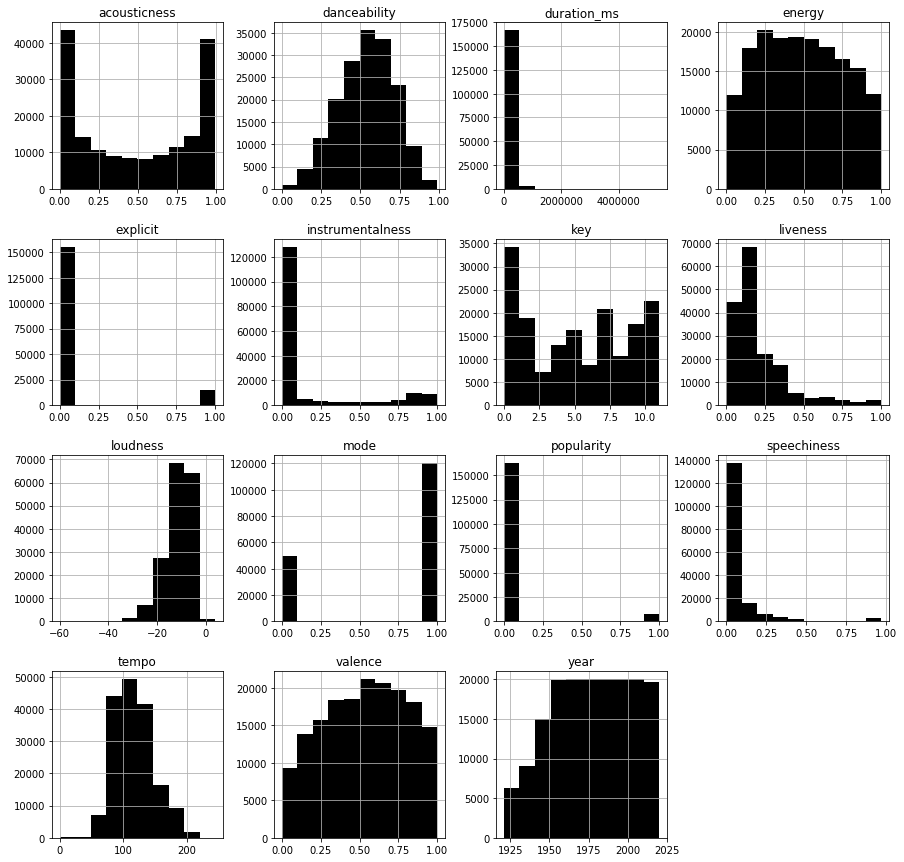

In [7]:
data3.hist(figsize=(15, 15), color='black')
plt.show()

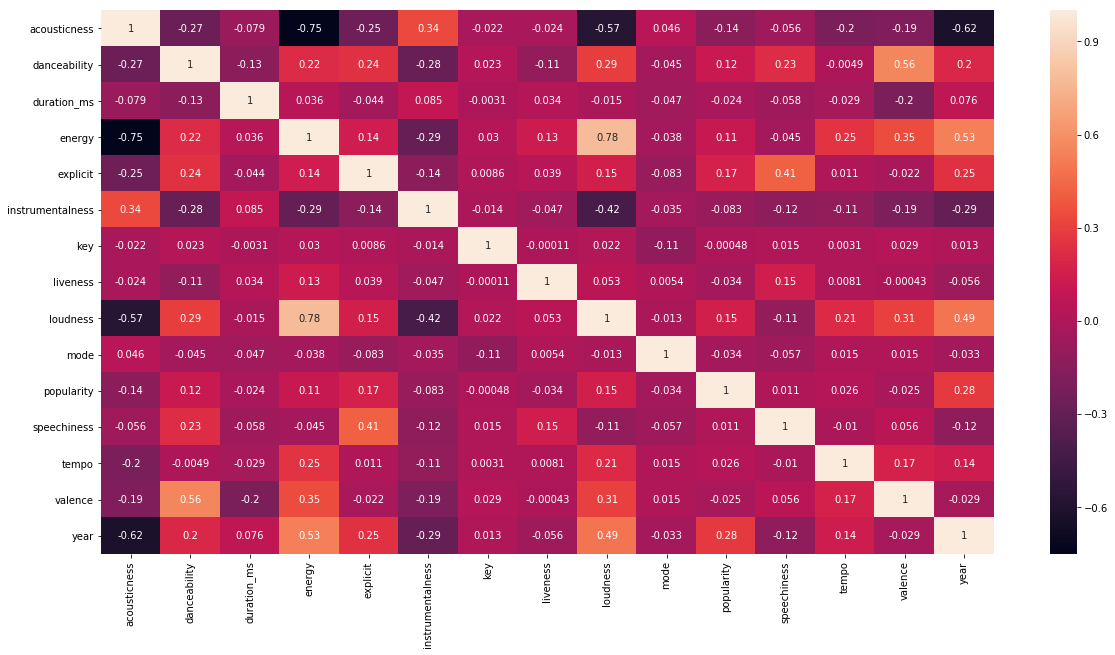

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(data3.corr(), annot=True)

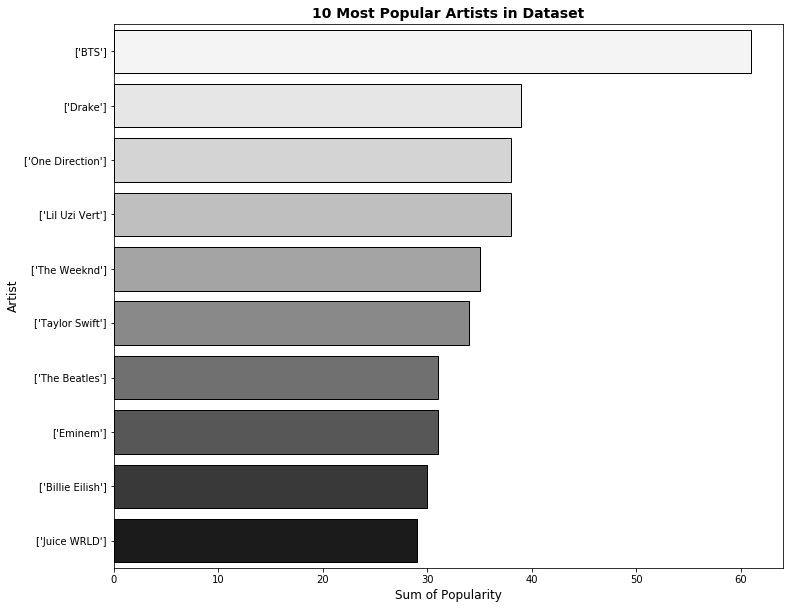

In [25]:
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = data3.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Greys", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', fontsize=12)
ax.set_ylabel('Artist', fontsize=12)
ax.set_title('10 Most Popular Artists in Dataset', fontsize=14, weight = 'bold')
plt.show()